<a href="https://colab.research.google.com/github/daniglevy/AI-Finance/blob/main/AI_F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the required libraries
!pip install pandas yfinance

# Import the libraries
import pandas as pd
import yfinance as yf
from datetime import datetime

# Function to download historical S&P 500 data
def download_sp500_data(start_date='2015-01-01'):
    sp500_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    sp500_tickers = sp500_df['Symbol'].tolist()
    ticker_mapping = {'BRK.B': 'BRK-B', 'BF.B': 'BF-B'}
    normalized_tickers = [ticker_mapping.get(ticker, ticker) for ticker in sp500_tickers]
    normalized_tickers.append('SPY')  # Ensure SPY is included for comparison
    data = yf.download(normalized_tickers, start=start_date, end=datetime.today().strftime('%Y-%m-%d'), auto_adjust=True)['Close']
    data.to_csv('sp500_data.csv')  # Save the data for reuse
    return data

# Download and save the data
data = download_sp500_data()
# Install the required library
!pip install pandas

# Import the library
import pandas as pd

# Function to load the saved S&P 500 data
def load_sp500_data():
    data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)
    return data

# Load the data from the CSV file
data = load_sp500_data()

[*********************100%***********************]  504 of 504 completed


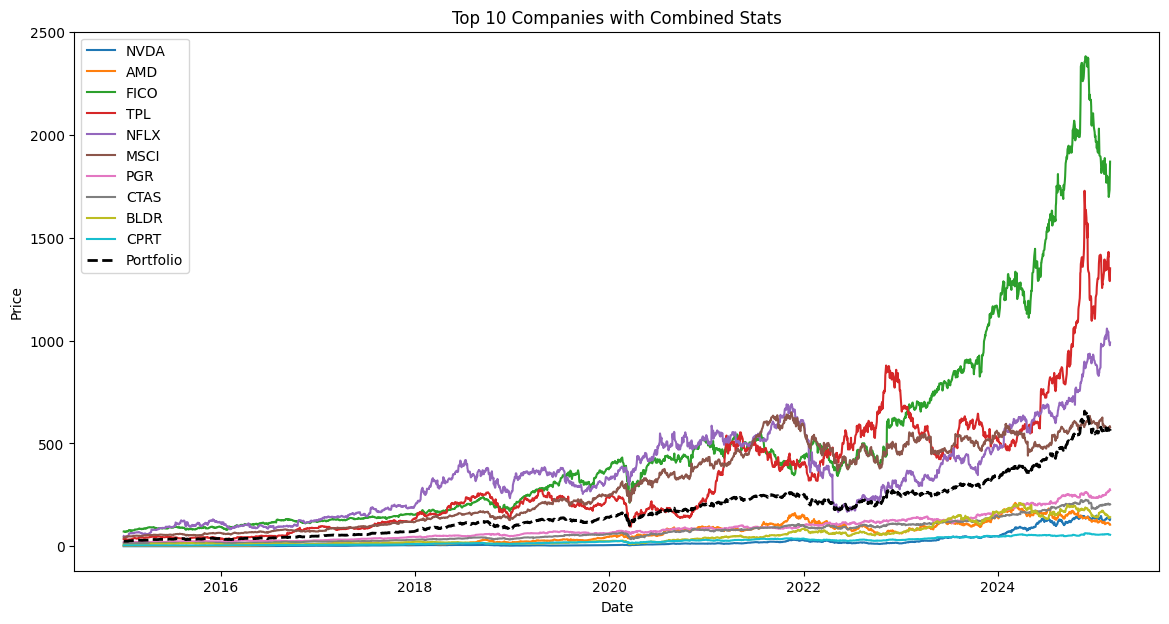

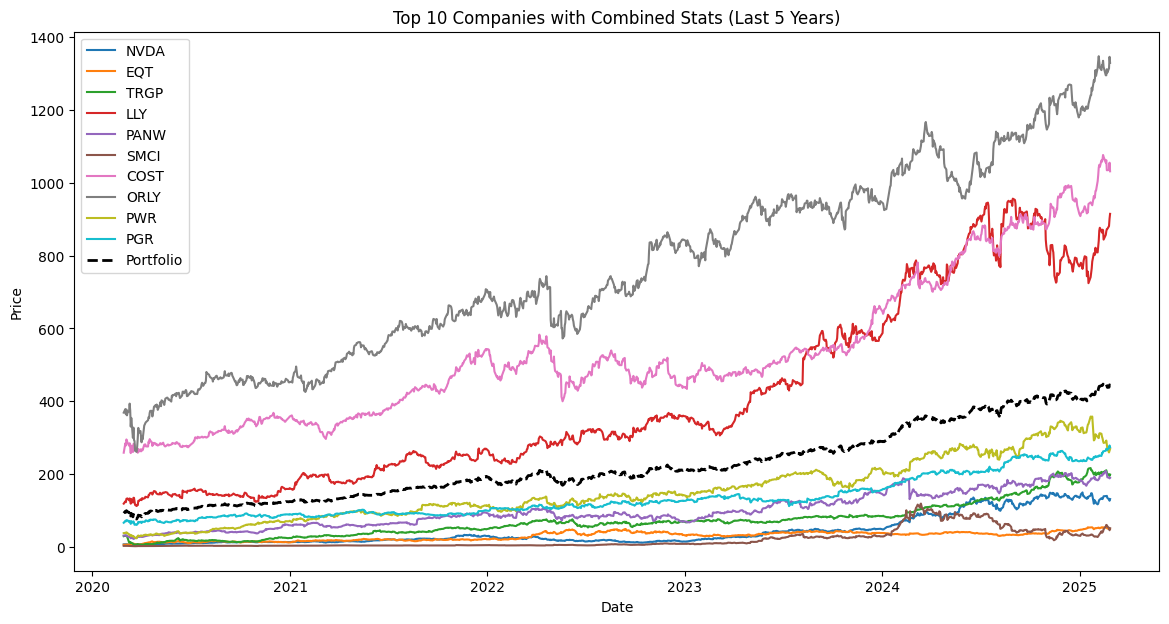

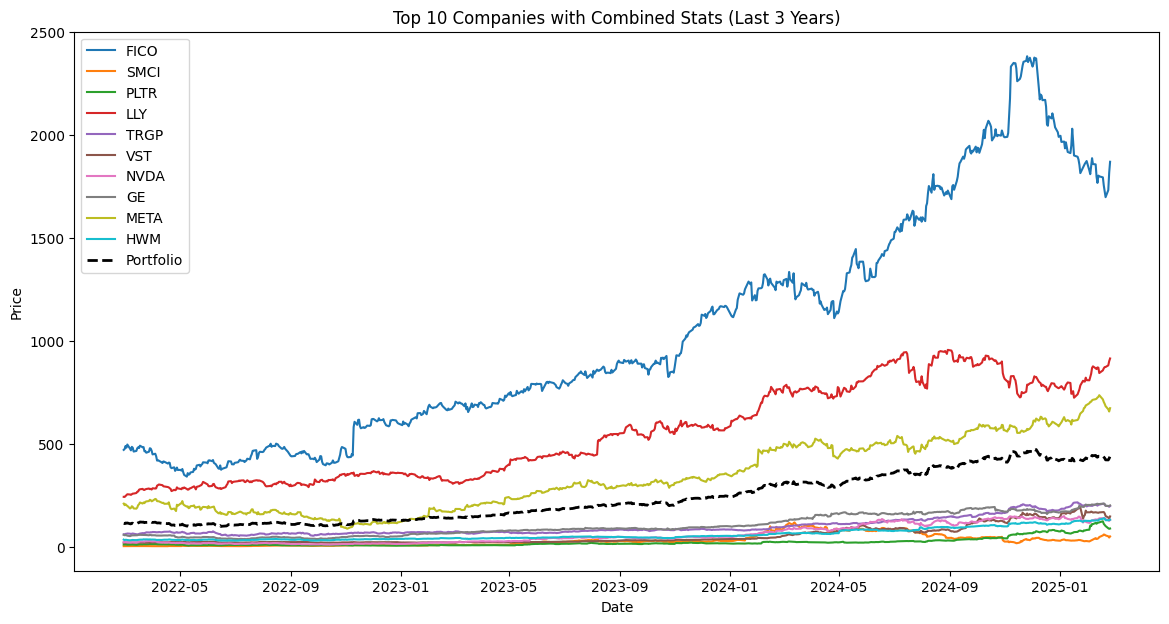

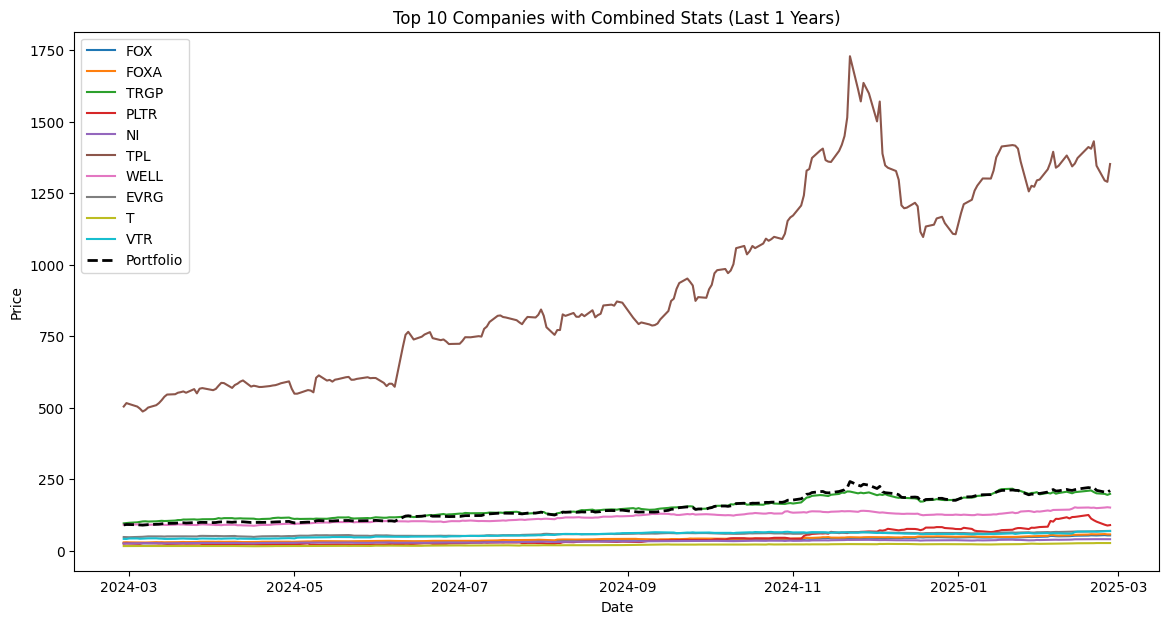

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the saved S&P 500 data
data = pd.read_csv('sp500_data.csv', index_col='Date', parse_dates=True)

# Function to calculate standard deviation and cumulative return
def calculate_metrics(data):
    returns = data.pct_change().dropna()
    std_dev = returns.std()
    cumulative_return = (data.iloc[-1] / data.iloc[0]) - 1
    return std_dev, cumulative_return

# Function to combine standard deviation and cumulative return
def combine_stats(std_dev, cumulative_return):
    combined_stats = cumulative_return / std_dev
    return combined_stats

# Function to plot stock charts and portfolio
def plot_combined_chart(data, tickers, title):
    plt.figure(figsize=(14, 7))
    for ticker in tickers:
        plt.plot(data[ticker], label=ticker)
    portfolio = data[tickers].mean(axis=1)
    plt.plot(portfolio, label='Portfolio', linewidth=2, linestyle='--', color='black')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Calculate metrics for the entire period
std_dev, cumulative_return = calculate_metrics(data)

# Combine standard deviation and cumulative return
combined_stats = combine_stats(std_dev, cumulative_return)

# Identify top 10 companies with combined stats
top_10_combined_stats = combined_stats.nlargest(10).index.tolist()

# Plot combined chart for top 10 companies with combined stats
plot_combined_chart(data, top_10_combined_stats, 'Top 10 Companies with Combined Stats')

# Function to perform analysis for a specific period (e.g., last 5 years)
def analyze_period(years):
    end_date = datetime.today()
    start_date = end_date.replace(year=end_date.year - years)

    # Filter data for the specific period
    period_data = data.loc[start_date:end_date]

    # Calculate metrics for the specific period
    period_std_dev, period_cumulative_return = calculate_metrics(period_data)

    # Combine standard deviation and cumulative return for the specific period
    period_combined_stats = combine_stats(period_std_dev, period_cumulative_return)

    # Identify top 10 companies with combined stats for the specific period
    period_top_10_combined_stats = period_combined_stats.nlargest(10).index.tolist()

    # Plot combined chart for the specific period
    plot_combined_chart(period_data, period_top_10_combined_stats, f'Top 10 Companies with Combined Stats (Last {years} Years)')

# Perform analysis for last 5 years
analyze_period(5)

# Perform analysis for last 3 years
analyze_period(3)

# Perform analysis for last 1 year
analyze_period(1)